<h3 style="text-align: center;"> <strong> Pruebas de modelos supervisados y no supervisados para el analisis de ofertas de empleo en el area de Tecnologias </strong></h3>

# Análisis Exploratorio

### Imports

In [72]:
# Núcleo y manipulación de datos
import numpy as np
import pandas as pd

# Visualización
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# Procesamiento de texto/NLP
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocesamiento y feature engineering
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    StandardScaler, 
    OneHotEncoder,
     LabelEncoder, 
    TargetEncoder,
    label_binarize
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Modelado y evaluación
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (
    accuracy_score, 
    ConfusionMatrixDisplay,
    roc_curve, 
    auc,
    silhouette_score,
    silhouette_samples
)

# Clustering
from sklearn.cluster import AgglomerativeClustering,DBSCAN,KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Manejo de desbalanceo de clases
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE

### Leer el CSV

In [73]:
postcsv_original = pd.read_csv('Data\\postings.csv')


### Exploración

In [74]:
postcsv_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   job_id                      123849 non-null  int64  
 1   company_name                122130 non-null  object 
 2   title                       123849 non-null  object 
 3   description                 123842 non-null  object 
 4   max_salary                  29793 non-null   float64
 5   pay_period                  36073 non-null   object 
 6   location                    123849 non-null  object 
 7   company_id                  122132 non-null  float64
 8   views                       122160 non-null  float64
 9   med_salary                  6280 non-null    float64
 10  min_salary                  29793 non-null   float64
 11  formatted_work_type         123849 non-null  object 
 12  applies                     23320 non-null   float64
 13  original_liste

In [75]:
postcsv_original.describe()

,job_id,max_salary,company_id,views,med_salary,min_salary,applies,original_listed_time,remote_allowed,expiry,closed_time,listed_time,sponsored,normalized_salary,zip_code,fips
count,1.238490e+05,2.979300e+04,1.221320e+05,122160.000000,6280.000000,2.979300e+04,23320.000000,1.238490e+05,15246.0,1.238490e+05,1.073000e+03,1.238490e+05,123849.0,3.607300e+04,102977.000000,96434.000000
mean,3.896402e+09,9.193942e+04,1.220401e+07,14.618247,22015.619876,6.491085e+04,10.591981,1.713152e+12,1.0,1.716213e+12,1.712928e+12,1.713204e+12,0.0,2.053270e+05,50400.491887,28713.879887
std,8.404355e+07,7.011101e+05,2.554143e+07,85.903598,52255.873846,4.959738e+05,29.047395,4.848209e+08,0.0,2.321394e+09,3.622893e+08,3.989122e+08,0.0,5.097627e+06,30252.232515,16015.929825
min,9.217160e+05,1.000000e+00,1.009000e+03,1.000000,0.000000,1.000000e+00,1.000000,1.701811e+12,1.0,1.712903e+12,1.712346e+12,1.711317e+12,0.0,0.000000e+00,1001.000000,1003.000000
25%,3.894587e+09,4.828000e+01,1.435200e+04,3.000000,18.940000,3.700000e+01,1.000000,1.712863e+12,1.0,1.715481e+12,1.712670e+12,1.712886e+12,0.0,5.200000e+04,24112.000000,13121.000000
50%,3.901998e+09,8.000000e+04,2.269650e+05,4.000000,25.500000,6.000000e+04,3.000000,1.713395e+12,1.0,1.716042e+12,1.712670e+12,1.713408e+12,0.0,8.150000e+04,48059.000000,29183.000000
75%,3.904707e+09,1.400000e+05,8.047188e+06,8.000000,2510.500000,1.000000e+05,8.000000,1.713478e+12,1.0,1.716088e+12,1.713283e+12,1.713484e+12,0.0,1.250000e+05,78201.000000,42077.000000
max,3.906267e+09,1.200000e+08,1.034730e+08,9975.000000,750000.000000,8.500000e+07,967.000000,1.713573e+12,1.0,1.729125e+12,1.713562e+12,1.713573e+12,0.0,5.356000e+08,99901.000000,56045.000000


In [76]:
postcsv_original.head()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0


#### Revisión de valores NAN o faltantes en el dataset

In [77]:
total_nan = postcsv_original.isna().sum()
print("Total de valores NaN en el dataset:\n", total_nan)

Total de valores NaN en el dataset:
 job_id                             0
company_name                    1719
title                              0
description                        7
max_salary                     94056
pay_period                     87776
location                           0
company_id                      1717
views                           1689
med_salary                    117569
min_salary                     94056
formatted_work_type                0
applies                       100529
original_listed_time               0
remote_allowed                108603
job_posting_url                    0
application_url                36665
application_type                   0
expiry                             0
closed_time                   122776
formatted_experience_level     29409
skills_desc                   121410
listed_time                        0
posting_domain                 39968
sponsored                          0
work_type                          0
c

### Filtrado de datos
 Debido a que mi proyecto integrador esta limitado a la facultad de sistemas y a licenciaturas afines a software. Dependiendo del modelo se utilizara este filtro o no.

In [78]:
filtered_titles = postcsv_original[postcsv_original['title'].str.contains('software', case=False, na=False)]

# Mostrar los títulos filtrados
print(filtered_titles)

            job_id        company_name  \
22       133130219                 NaN   
26       175485704                GOYT   
36       266825034  Recruitment Design   
181     3586167732             StyleAI   
237     3700068571         Akshaya Inc   
...            ...                 ...   
123472  3906259133           Scorebird   
123496  3906259194           IDR, Inc.   
123507  3906259210               nVent   
123797  3906263103  Rose International   
123845  3906267126           Pinterest   

                                               title  \
22                                 Software Engineer   
26                                 Software Engineer   
36                       Software Support Specialist   
181                         Senior Software Engineer   
237          Software Implementation Program Manager   
...                                              ...   
123472                    Embedded Software Engineer   
123496                        Software Engineer

#### Revisión de la distribución del filtro

In [79]:
title_distribution = filtered_titles['title'].value_counts()

# Print the distribution of job titles
titles=pd.Series(title_distribution) 
print(titles)

title
Software Engineer                             181
Senior Software Engineer                      162
Software Developer                             60
Embedded Software Engineer                     30
Lead Software Engineer                         20
                                             ... 
Software Engineer - DevOps, Global Banking      1
Senior Manager of Software Engineering          1
Staff Software Engineer, Full-Stack (Ruby)      1
Staff Software Engineer (Mobile), Bitkey        1
Software Engineer (Remote)                      1
Name: count, Length: 1141, dtype: int64


#### Exploración de los datos filtrados

In [80]:
filtered_titles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2014 entries, 22 to 123845
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      2014 non-null   int64  
 1   company_name                1997 non-null   object 
 2   title                       2014 non-null   object 
 3   description                 2014 non-null   object 
 4   max_salary                  645 non-null    float64
 5   pay_period                  676 non-null    object 
 6   location                    2014 non-null   object 
 7   company_id                  1997 non-null   float64
 8   views                       1992 non-null   float64
 9   med_salary                  31 non-null     float64
 10  min_salary                  645 non-null    float64
 11  formatted_work_type         2014 non-null   object 
 12  applies                     837 non-null    float64
 13  original_listed_time        2014 no

In [81]:
filtered_titles.describe()

,job_id,max_salary,company_id,views,med_salary,min_salary,applies,original_listed_time,remote_allowed,expiry,closed_time,listed_time,sponsored,normalized_salary,zip_code,fips
count,2.014000e+03,645.000000,1.997000e+03,1992.000000,31.000000,645.000000,837.000000,2.014000e+03,563.0,2.014000e+03,2.500000e+01,2.014000e+03,2014.0,676.000000,1455.000000,1334.000000
mean,3.893593e+09,169868.531643,1.684218e+07,32.711847,77650.064516,110605.929597,19.626045,1.713141e+12,1.0,1.716259e+12,1.713124e+12,1.713229e+12,0.0,159782.714401,56571.452921,29340.606447
std,1.434777e+08,114188.148483,3.111404e+07,82.930767,81444.210240,67986.475600,45.089278,5.724489e+08,0.0,2.353138e+09,4.073518e+08,3.843589e+08,0.0,75405.621988,33620.792673,17894.765601
min,1.331302e+08,22.000000,1.009000e+03,1.000000,0.000000,15.000000,1.000000,1.704737e+12,1.0,1.714730e+12,1.712348e+12,1.712346e+12,0.0,0.000000,1103.000000,1003.000000
25%,3.894959e+09,110729.000000,4.501000e+03,4.000000,54.500000,75300.000000,2.000000,1.712866e+12,1.0,1.715485e+12,1.712673e+12,1.712892e+12,0.0,120000.000000,23219.000000,12009.000000
50%,3.902307e+09,174000.000000,3.096940e+05,6.000000,80000.000000,115000.000000,6.000000,1.713398e+12,1.0,1.716046e+12,1.713287e+12,1.713453e+12,0.0,155000.000000,60601.000000,31048.000000
75%,3.904502e+09,228000.000000,1.142096e+07,25.000000,142500.000000,150000.000000,16.000000,1.713476e+12,1.0,1.716086e+12,1.713458e+12,1.713482e+12,0.0,188432.500000,92602.000000,48113.000000
max,3.906267e+09,1000000.000000,1.034565e+08,1156.000000,300500.000000,500000.000000,508.000000,1.713572e+12,1.0,1.729118e+12,1.713493e+12,1.713573e+12,0.0,960000.000000,99163.000000,55133.000000


In [82]:
num_nan = filtered_titles.isna().sum()

print(f'Número de valores NaN: {num_nan}')

Número de valores NaN: job_id                           0
company_name                    17
title                            0
description                      0
max_salary                    1369
pay_period                    1338
location                         0
company_id                      17
views                           22
med_salary                    1983
min_salary                    1369
formatted_work_type              0
applies                       1177
original_listed_time             0
remote_allowed                1451
job_posting_url                  0
application_url                589
application_type                 0
expiry                           0
closed_time                   1989
formatted_experience_level     548
skills_desc                   1999
listed_time                      0
posting_domain                 769
sponsored                        0
work_type                        0
currency                      1338
compensation_type             13

<div class="alert alert-success", role="alert">
<h1>PARTE I<h1>
</div>

# Aprendizaje Supervisado

Definición de Funciones o metodos

In [83]:
def plot_confusion_matrix(y_true, y_pred, title):
    plt.figure(figsize=(10, 8))
    ConfusionMatrixDisplay.from_predictions(
        y_true, y_pred,
        display_labels=label_encoder.classes_,
        cmap='Blues',
        normalize='true',
        xticks_rotation=45
    )
    plt.title(title)
    plt.show()

## 1. Enfoque de clasificación (predicción de variables discretas).
Libreria:SKlaern<br>
 Modelo:Random Forest Classifier

#### Eliminación de columnas 

In [84]:
cols_to_drop =['job_id', 'company_id', 'job_posting_url', 
               'application_url', 'skills_desc', 'closed_time',
               'zip_code', 'fips', 'expiry', 'listed_time']
dfRandonForest = filtered_titles.drop(columns=cols_to_drop)

#### Selección del Target y Filtrado de clases con menos de 2 muestras (mínimo para split estratificado)

In [85]:
target = 'formatted_experience_level'
min_samples_per_class = 5
value_counts = dfRandonForest[target].value_counts()
valid_classes = value_counts[value_counts >= min_samples_per_class].index
dfRandonForest = dfRandonForest[dfRandonForest[target].isin(valid_classes)]

#### División X & Y

In [86]:
X = dfRandonForest.drop(columns=[target])
y = dfRandonForest[target]

#### Label encoder

In [87]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded

array([4, 4, 4, ..., 4, 4, 4])

#### Revisión de la distribución de datos

In [88]:
print("Distribución de clases final:")
print(pd.Series(y_encoded).value_counts().sort_index())
print(f"Número de clases: {len(label_encoder.classes_)}")

Distribución de clases final:
0     109
1      22
2     288
3      24
4    1020
Name: count, dtype: int64
Número de clases: 5


#### División de datos

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=42, stratify=y_encoded)

#### Preprocesamiento para diferentes tipos de columnas
Esto es necesario para un correcto funcionamiento del modelo 

In [90]:
text_features = ['title', 'description']  # Incluimos ambos campos de texto
categorical_features = ['company_name', 'location', 'application_type',
                        'posting_domain', 'work_type', 'currency',
                        'compensation_type', 'pay_period']
numerical_features = ['max_salary', 'views', 'min_salary', 'applies',
                     'original_listed_time', 'remote_allowed', 'normalized_salary']

#### Pipeline: Este metodo nos perimte realizar: Scaler, OnHotEncoder, Imputer, Vectorizer. En una sola configuración.

In [91]:
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(max_features=500, stop_words='english'), 'description'),
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())]), numerical_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]), categorical_features)
    ],
    remainder='drop'
)


#### Configuración del Modelo

In [92]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
         class_weight='balanced',
        n_estimators=200,
        max_depth=10,
        random_state=42
    ))
])

#### Entrenamiento del Modelo

In [93]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text',
                                                  TfidfVectorizer(max_features=500,
                                                                  stop_words='english'),
                                                  'description'),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['max_salary', 'views',
                                                   'min_salary', 'applies',
                                                   'original_listed_time',
                                                   'remote_allowed',
                                                   'normalized_salary']),
                                                 ('c...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['company_name', 'location',
                                                   'application_type',
                                                   'posting_domain',
                                                   'work_type', 'currency',
                                                   'compensation_type',
                                                   'pay_period'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        n_estimators=200, random_state=42))])

#### Metricas

#### Predicciónes

In [94]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

#### Exactitud (Accuracy)

In [95]:
print(f"Accuracy entrenamiento: {accuracy_score(y_train, y_pred_train):.4f}")
print(f"Accuracy test: {accuracy_score(y_test, y_pred_test):.4f}\n")

Accuracy entrenamiento: 0.9954
Accuracy test: 0.7295



#### Matriz de Confución

<Figure size 1000x800 with 0 Axes>

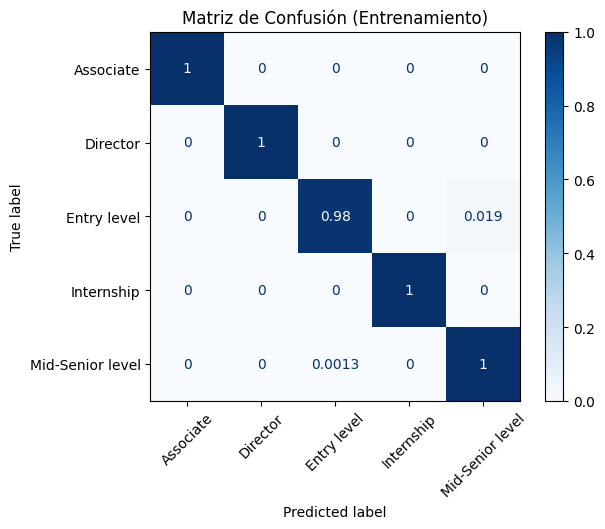

<Figure size 1000x800 with 0 Axes>

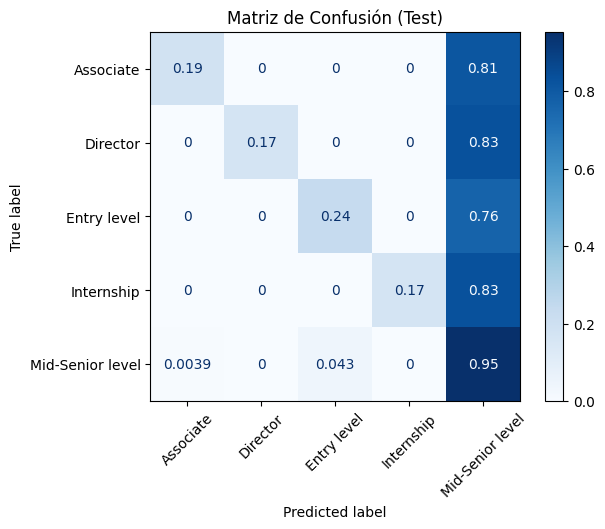

In [96]:
plot_confusion_matrix(y_train,y_pred_train,'Matriz de Confusión (Entrenamiento)')
plot_confusion_matrix(y_test,y_pred_test,'Matriz de Confusión (Test)')


#### Curva ROC

#### Binarizar los labels

In [97]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))

#### Obtener probabilidades


In [98]:
y_proba = model.predict_proba(X_test)

#### Calcular curva ROC y AUC para cada clase


In [99]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


#### Grafica de curva roc


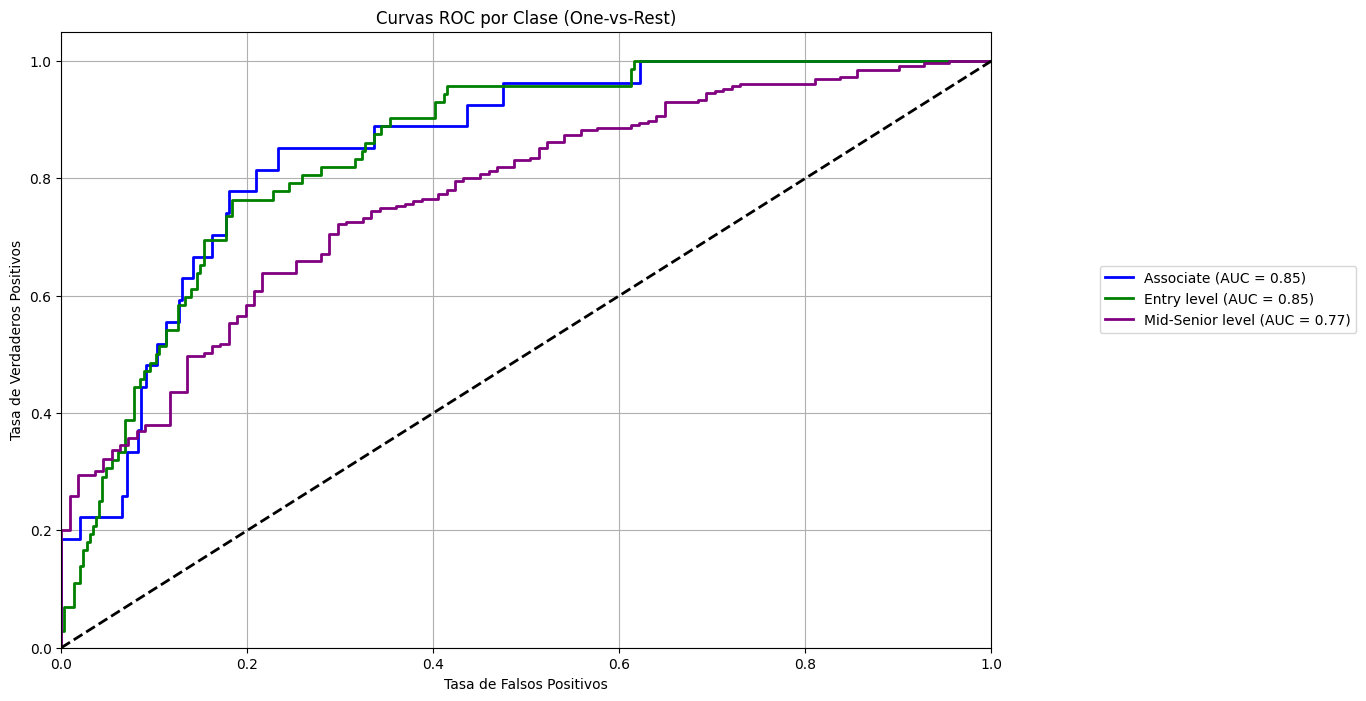

In [100]:
plt.figure(figsize=(12, 8))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown']

for i, color in zip(range(len(label_encoder.classes_)), colors[:len(label_encoder.classes_)]):
    # Solo mostrar clases con al menos 10 muestras en test
    if np.sum(y_test == i) >= 10:
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='{0} (AUC = {1:0.2f})'.format(label_encoder.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC por Clase (One-vs-Rest)')
plt.legend(loc="lower right", bbox_to_anchor=(1.4, 0.5))
plt.grid(True)
plt.show()



#### AUC Macro-promediado


In [101]:
macro_auc = np.mean(list(roc_auc.values()))
print(f"AUC Macro: {macro_auc:.3f}")

AUC Macro: 0.882


#### AUC Ponderado por soporte


In [102]:
weights = np.sum(y_test_bin, axis=0)
weighted_auc = np.average(list(roc_auc.values()), weights=weights)
print(f"AUC Ponderado: {weighted_auc:.3f}")

AUC Ponderado: 0.799


## 2.Enfoque de clasificación (predicción de variables discretas)
Libreria:TensorFLOW<br>
 Modelo:MLP

Por motivos de comodidad reutilizare el preprocesameinto hecho para el modelo anterior.

In [103]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

#### Calculamos los pesos

In [104]:
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = {i: class_weights[i] for i in range(len(class_weights))}

print("Pesos de clases:", class_weights)


Pesos de clases: {0: np.float64(2.675609756097561), 1: np.float64(13.7125), 2: np.float64(1.0157407407407408), 3: np.float64(12.188888888888888), 4: np.float64(0.28679738562091506)}


#### Aplicamos SMOTE
proporciona un algoritmo de sobremuestreo para tratar con conjuntos de datos desequilibrados.

In [105]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_preprocessed, y_train)

#### División de datos

In [106]:
X_train_res, y_train_res = smote.fit_resample(X_train_preprocessed, y_train)

#### Configuración del Modelo MLP

In [107]:
input_dim = X_train_res.shape[1]
num_classes = len(label_encoder.classes_)

model_mlp = Sequential([
    Dense(256, activation='relu', input_shape=(input_dim,)),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation='relu'),
    Dropout(0.2),
    
    Dense(num_classes, activation='softmax')
])

c:\Users\Darki\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Compilación 

In [108]:
optimizer = Adam(learning_rate=0.001)
model_mlp.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=50,# 25% de epcoas del modelo sin mejora.
    restore_best_weights=True
)

#### Entrenamiento

In [109]:
history = model_mlp.fit(
    X_train_res, y_train_res,
    epochs=200,
    batch_size=64,
    validation_split=0.2,
        callbacks=[early_stopping],
    class_weight=dict(enumerate(class_weights)) 
)

Epoch 1/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3755 - loss: 2.6262 - val_accuracy: 0.0078 - val_loss: 2.3206
Epoch 2/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6483 - loss: 0.8399 - val_accuracy: 0.0131 - val_loss: 3.0039
Epoch 3/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7021 - loss: 0.4353 - val_accuracy: 0.0235 - val_loss: 3.2033
Epoch 4/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6964 - loss: 0.4069 - val_accuracy: 0.0235 - val_loss: 3.1665
Epoch 5/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7257 - loss: 0.2565 - val_accuracy: 0.0235 - val_loss: 2.8169
Epoch 6/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7181 - loss: 0.1641 - val_accuracy: 0.0444 - val_loss: 2.3552
Epoch 7/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7191 - loss: 0.1966 - val_accuracy: 0.2092 - val_loss: 1.7543
Epoch 8/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7264 - loss: 0.1610 - val_accuracy: 0.7569 - 

#### Evaluación y Métricas

#### Accuracy entrenamiento y test

In [110]:
train_loss, train_acc = model_mlp.evaluate(X_train_res, y_train_res, verbose=0)
test_loss, test_acc = model_mlp.evaluate(X_test_preprocessed, y_test, verbose=0)
print(f"\nAccuracy Train: {train_acc:.3f}")
print(f"Accuracy Test: {test_acc:.3f}")



Accuracy Train: 0.799
Accuracy Test: 0.708


#### Predicciones y probabilidades

In [111]:
y_pred_proba = model_mlp.predict(X_test_preprocessed)
y_pred = np.argmax(y_pred_proba, axis=1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


#### Matriz de Confusión

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


<Figure size 1000x800 with 0 Axes>

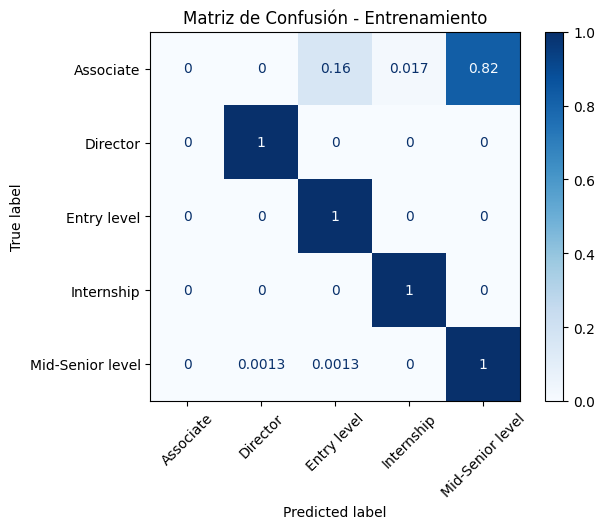

<Figure size 1000x800 with 0 Axes>

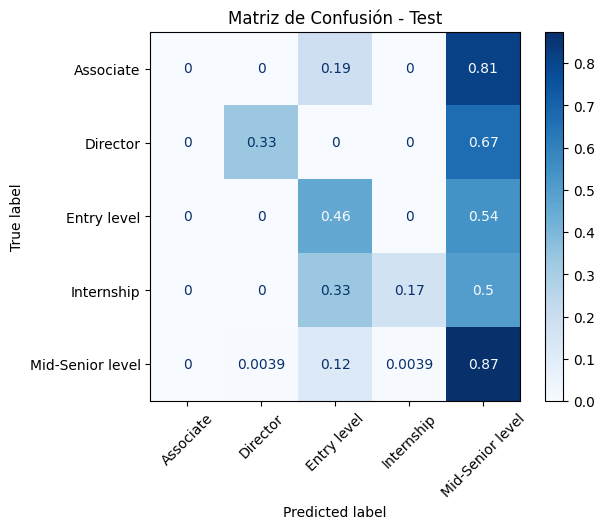

In [112]:
# Predicciones para Train y Test
y_pred_train = np.argmax(model_mlp.predict(X_train_res), axis=1)
y_pred_test = np.argmax(model_mlp.predict(X_test_preprocessed), axis=1)

plot_confusion_matrix(y_train_res, y_pred_train, 'Matriz de Confusión - Entrenamiento')
plot_confusion_matrix(y_test, y_pred_test, 'Matriz de Confusión - Test')

#### Curvas ROC

In [113]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


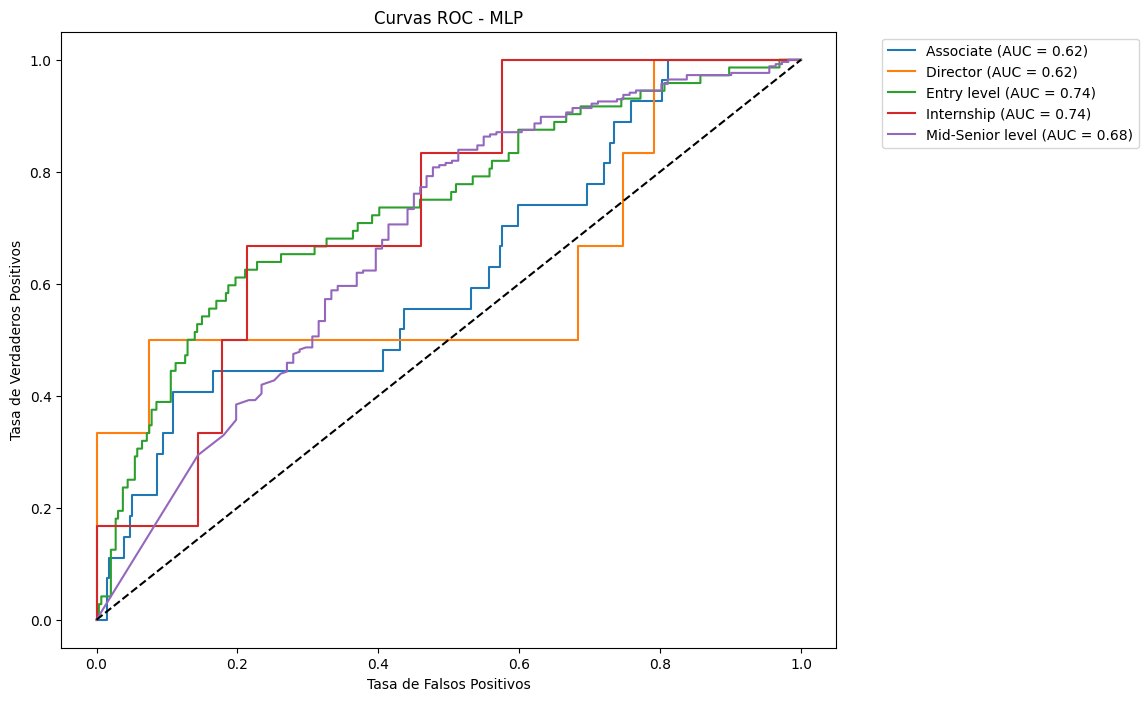

In [114]:
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test == i, y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f'{label_encoder.classes_[i]} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC - MLP')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

#### Historial de Entrenamiento

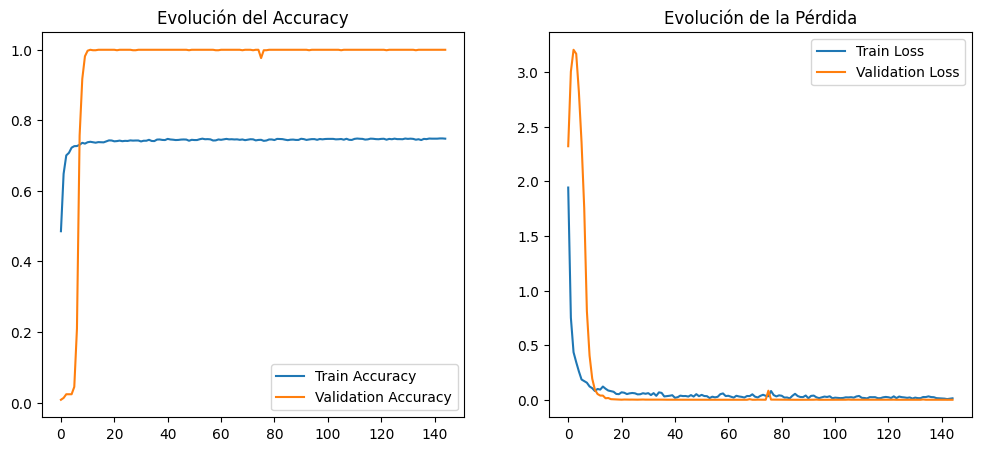

In [115]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Evolución del Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Evolución de la Pérdida')
plt.legend()
plt.show()

## 3. Enfoque de regresión (predicción de variables continuas).
Libreria:SKlaern<br>
 Modelo:Randon Forest Regresor

#### Cargar datos y filtrar


En este caso por cuestiones de comodidad se ha preferido utilizar todo el dataset.

In [116]:
df = postcsv_original
df = df.dropna(subset=["max_salary"])

#### Seleccionar variables  relevantes

In [117]:

numeric_cols = [
    "normalized_salary", "max_salary", "min_salary", 
    "views", "applies", "remote_allowed", 
    "listed_time", "fips", "sponsored"
]
categorical_cols = [
    "pay_period", 
    "formatted_experience_level",
    "work_type", 
    "compensation_type",
    "currency",
    "application_type",
    "formatted_work_type"
]

#### Target Encoding

In [118]:
encoder = TargetEncoder()
df_encoded = df.copy()
df_encoded[categorical_cols] = encoder.fit_transform(df[categorical_cols], df["normalized_salary"])

df_fil = df_encoded[numeric_cols+categorical_cols].dropna(how="all", axis=1).dropna()

#### División de Y & X

In [119]:
y = df_fil["max_salary"]
X = df_fil[numeric_cols+categorical_cols]
X = X.copy()
X.drop(columns=['applies', 'remote_allowed','max_salary'], inplace=True)

#### División de datos

In [120]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#### Definición del modelo

In [121]:
model = RandomForestRegressor(
        n_estimators=200,
        max_depth=8,
        min_samples_leaf=20,
        n_jobs=-1,
        random_state=42)

#### Entrenamiento del modelo

In [122]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=20, n_estimators=200,
                      n_jobs=-1, random_state=42)

#### Metricas

In [123]:
r2_train = model.score(X_train, y_train)
r2_test = model.score(X_test, y_test)

print(f"R² entrenamiento: {r2_train:.3f}")
print(f"R² prueba: {r2_test:.3f}")

R² entrenamiento: 0.856
R² prueba: 0.768


#### Comentarios Finales de la Parte I
Los modelos de clasificadores no me presentaron grandes problemas, pero el modelo de regresión me costo mucho, primero cambie varias veces de variable objetivo, revisé correlaciónes y probe regresión lineal, el mejor modelo de todo lo que probe es el presentado en esta sección.

<div class="alert alert-success", role="alert">
<h1>PARTE II<h1>
</div>

# Aprendizaje No Supervisado

Definición de Funciones o metodos

In [124]:
def graficaSilueta(X:pd.DataFrame, cluster_labels, n_clusters):
    # Calcular el coeficiente de silueta
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_vals = silhouette_samples(X, cluster_labels)

    print(f"Coeficiente de Silueta Promedio: {silhouette_avg:.3f}")

    # Graficar la silueta
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    # El primer subplot es la Gráfica de la silueta
    # El coeficiente es un valor entre -1 y 1
    ax1.set_xlim([-1, 1])

    # Graficar la silueta
    plt.figure(figsize=(8, 5))
    y_lower = 10
    for i in range(n_clusters):
        cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
        cluster_silhouette_vals.sort()

        y_upper = y_lower + len(cluster_silhouette_vals)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, alpha=0.7)
        ax1.text(-0.05, (y_lower + y_upper) / 2, str(i))
        y_lower = y_upper + 10  # Espacio entre clusters

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--", label="Silhouette Score")
    ax1.set_xlabel("Coeficiente de Silueta")
    ax1.set_ylabel("Clusters")
    ax1.set_title("Gráfico de Silueta")
    ax1.legend()

    # Segundo plot mostrando los clusters formados
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[0], X[1], marker=".", s=60, lw=0, alpha=0.7, c=colors, edgecolor="k")
    plt.show()

In [125]:
def scatter(x,y,Label,Mod):
    plt.figure(figsize=(10, 6))
    plt.scatter(x,y, c=Label, cmap='rainbow')
    plt.xlabel('x1')
    plt.ylabel('X2')
    plt.title(f'{ Mod } para ofertas de empleo relacionados con Software')
    plt.colorbar(label='clusters')
    plt.show()

In [126]:
def dendo(x):
    Z = linkage(x, method="ward")
    plt.figure(figsize=(15, 8))
    dendrogram(Z, truncate_mode="lastp", p=20, show_leaf_counts=True)
    plt.title("Dendrograma de Clustering Jerárquico")
    plt.xlabel("Número de Muestras")
    plt.ylabel("Distancia")
    plt.show()

In [127]:
def filtrado(X,label):
        # Configuración inicial
    UMBRAL_PORCENTAJE = 1.0  # 1% mínimo para considerar cluster significativo

    # 1. Dataframe con TODOS los clusters (incluyendo ruido -1)
    df_original = pd.DataFrame(X).assign(Clusters=label)

    # 2. Calcular distribución ORIGINAL (incluyendo ruido)
    conteo_original_total = df_original['Clusters'].value_counts()
    porcentaje_original_total = (conteo_original_total / len(df_original) * 100).round(2)

    print("Distribución original INCLUYENDO ruido:")
    print(f"{'Cluster':<10} {'Count':<10} {'Percentage':<10}")
    for cluster, count in conteo_original_total.items():
        print(f"{cluster:<10} {count:<10} {porcentaje_original_total[cluster]:<10}%")

    # 3. Filtrar solo ruido (-1)
    mask = label != -1
    x2d_filtered = X[mask]
    labels_filtered = label[mask]

    # 4. Dataframe SIN ruido
    dfx_clus = pd.DataFrame(x2d_filtered).assign(Clusters=labels_filtered)

    # 5. Calcular distribución ANTES de filtrar clusters pequeños
    conteo_sin_ruido = dfx_clus['Clusters'].value_counts()
    porcentaje_sin_ruido = (conteo_sin_ruido / len(dfx_clus) * 100).round(2)

    print("\nDistribución SIN ruido pero CON clusters pequeños:")
    print(f"{'Cluster':<10} {'Count':<10} {'Percentage':<10}")
    for cluster, count in conteo_sin_ruido.items():
        print(f"{cluster:<10} {count:<10} {porcentaje_sin_ruido[cluster]:<10}%")

    # 6. Filtrar clusters insignificantes
    clusters_insignificantes = porcentaje_sin_ruido[porcentaje_sin_ruido < UMBRAL_PORCENTAJE].index
    dfx_filtrado = dfx_clus[~dfx_clus['Clusters'].isin(clusters_insignificantes)]

    # 7. Calcular estadísticas finales
    clusters_finales = dfx_filtrado['Clusters'].nunique()
    conteo_final = dfx_filtrado['Clusters'].value_counts()
    porcentaje_final = (conteo_final / len(dfx_filtrado) * 100).round(2)

    # 8. Resultados
    print("\n--------------------------------------------------")
    print(f"Datos originales: {len(df_original)} registros")
    print(f"Ruido eliminado: {conteo_original_total.get(-1, 0)} registros")
    print(f"Clusters pequeños eliminados: {len(clusters_insignificantes)}")
    print(f"Número final de clusters: {clusters_finales}")

    print("\nDistribución FINAL de clusters significativos:")
    print(f"{'Cluster':<10} {'Count':<10} {'Percentage':<10}")
    for cluster, count in conteo_final.items():
        print(f"{cluster:<10} {count:<10} {porcentaje_final[cluster]:<10}%")
    return dfx_filtrado , clusters_finales

## 1. Clustering Aglomerativo
Libreria:SKlaern<br>
 Modelo:Agglomerative Clustering

#### Preparación de los datos

In [128]:
df=filtered_titles.copy()
# Eliminar columnas no relevantes para clustering
df = df.drop(columns=["job_id", "job_posting_url", "application_url"])
# Elimina columnas con muchos nans
df= df.drop(columns=['applies', 'remote_allowed','med_salary','closed_time','skills_desc','posting_domain'])
# Eliminar filas con muchos NaN 
df = df.dropna(subset=['max_salary', "min_salary", "location",'fips','formatted_experience_level','views','company_name']) 

#### Identificar columnas categóricas-numéricas  y Transformar

In [129]:
categorical_cols = ["company_name", "title", "location", "formatted_experience_level", "work_type"]
numeric_cols = ["max_salary", "min_salary", "views", "listed_time"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

X_processed = preprocessor.fit_transform(df)

#### Reducción de componenetes con PCA para crear un Dataset 2D

In [130]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed.toarray())

#### Dendodrama

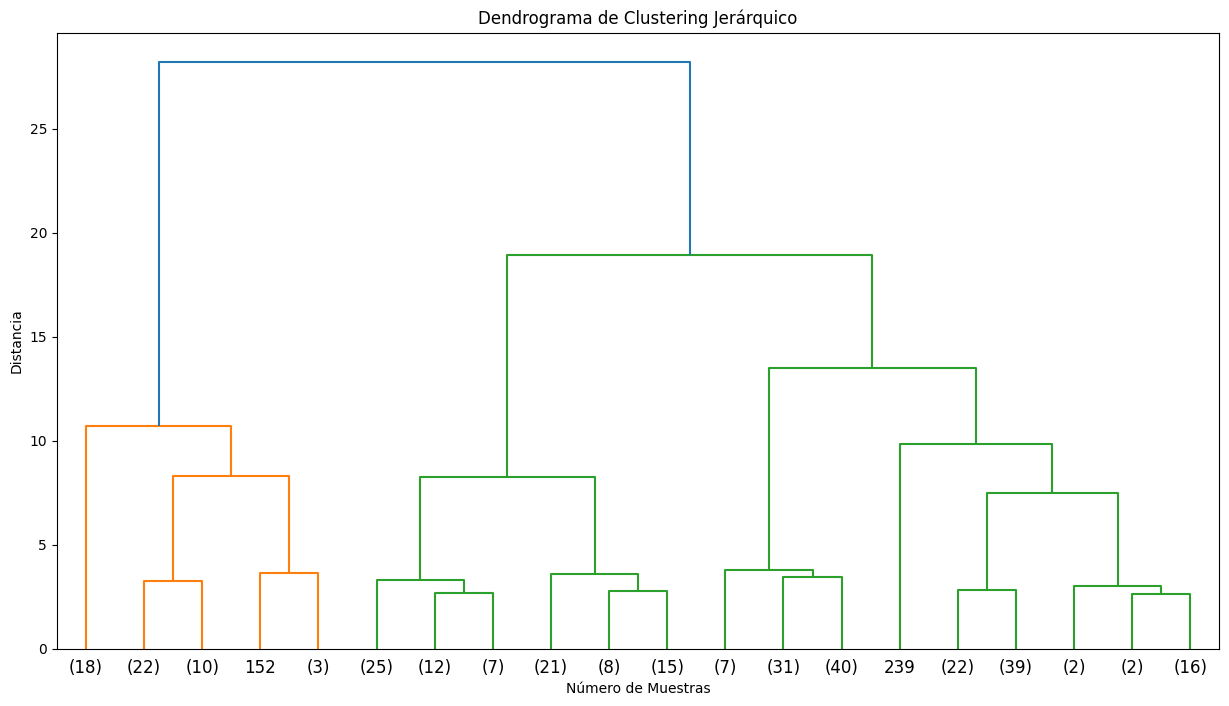

In [131]:
dendo(X_pca)

#### Configuración del modelo

In [132]:
model = AgglomerativeClustering(
    n_clusters=5,        
    metric="euclidean",   
    linkage="ward"           
)

#### Entrenar modelo

In [133]:
clusters = model.fit_predict(X_pca)

#### Grafica de puntos

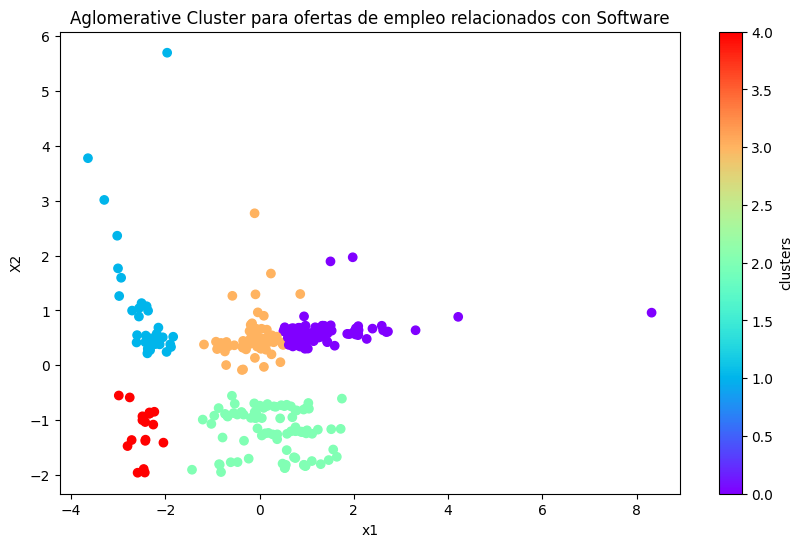

In [134]:
dfx=pd.DataFrame(X_pca)
scatter(dfx[0],dfx[1],clusters,'Aglomerative Cluster')

#### Grafica de Silueta 

Coeficiente de Silueta Promedio: 0.465


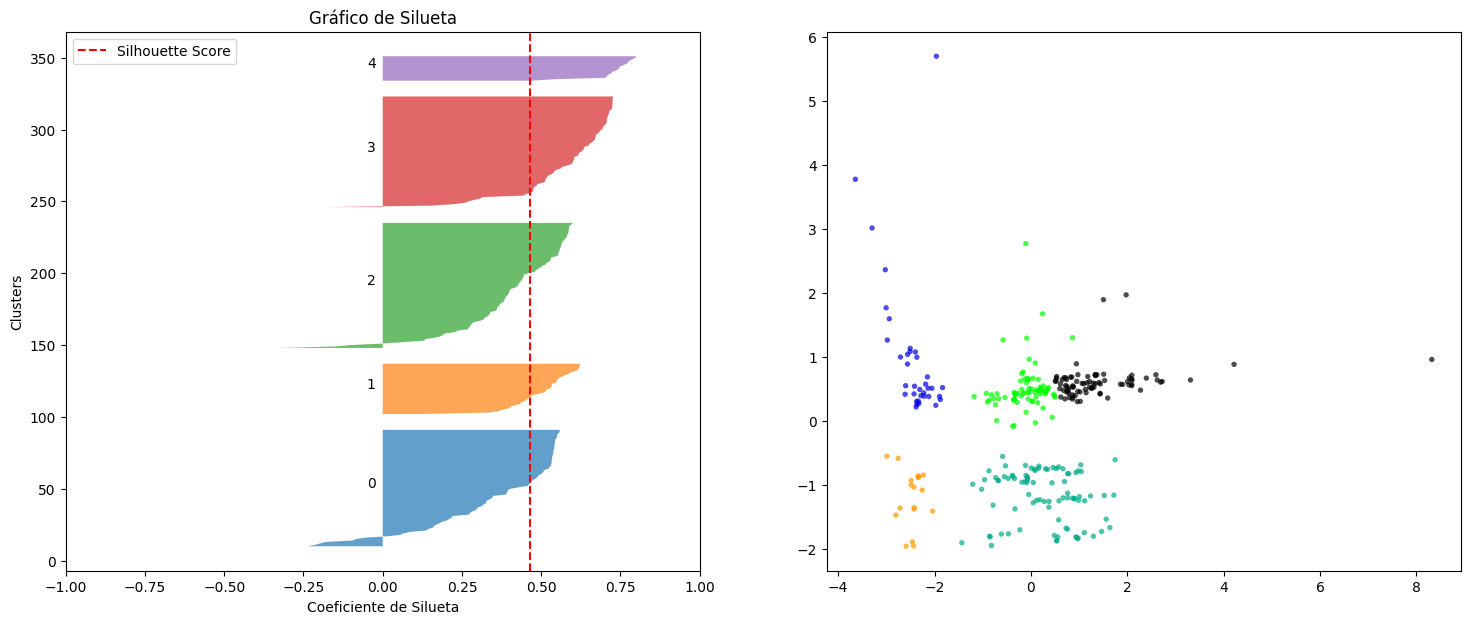

<Figure size 800x500 with 0 Axes>

In [135]:
graficaSilueta(dfx[[0,1]],clusters,len(np.unique(clusters)))

#### Filtrado de datos "Ruido"

In [136]:
dfx_filtrado , n_cluster=filtrado(dfx,clusters)

Distribución original INCLUYENDO ruido:
Cluster    Count      Percentage
2          88         29.14     %
0          82         27.15     %
3          78         25.83     %
1          36         11.92     %
4          18         5.96      %

Distribución SIN ruido pero CON clusters pequeños:
Cluster    Count      Percentage
2          88         29.14     %
0          82         27.15     %
3          78         25.83     %
1          36         11.92     %
4          18         5.96      %

--------------------------------------------------
Datos originales: 302 registros
Ruido eliminado: 0 registros
Clusters pequeños eliminados: 0
Número final de clusters: 5

Distribución FINAL de clusters significativos:
Cluster    Count      Percentage
2          88         29.14     %
0          82         27.15     %
3          78         25.83     %
1          36         11.92     %
4          18         5.96      %


#### Grafica de Silueta Filtrada

Coeficiente de Silueta Promedio: 0.465


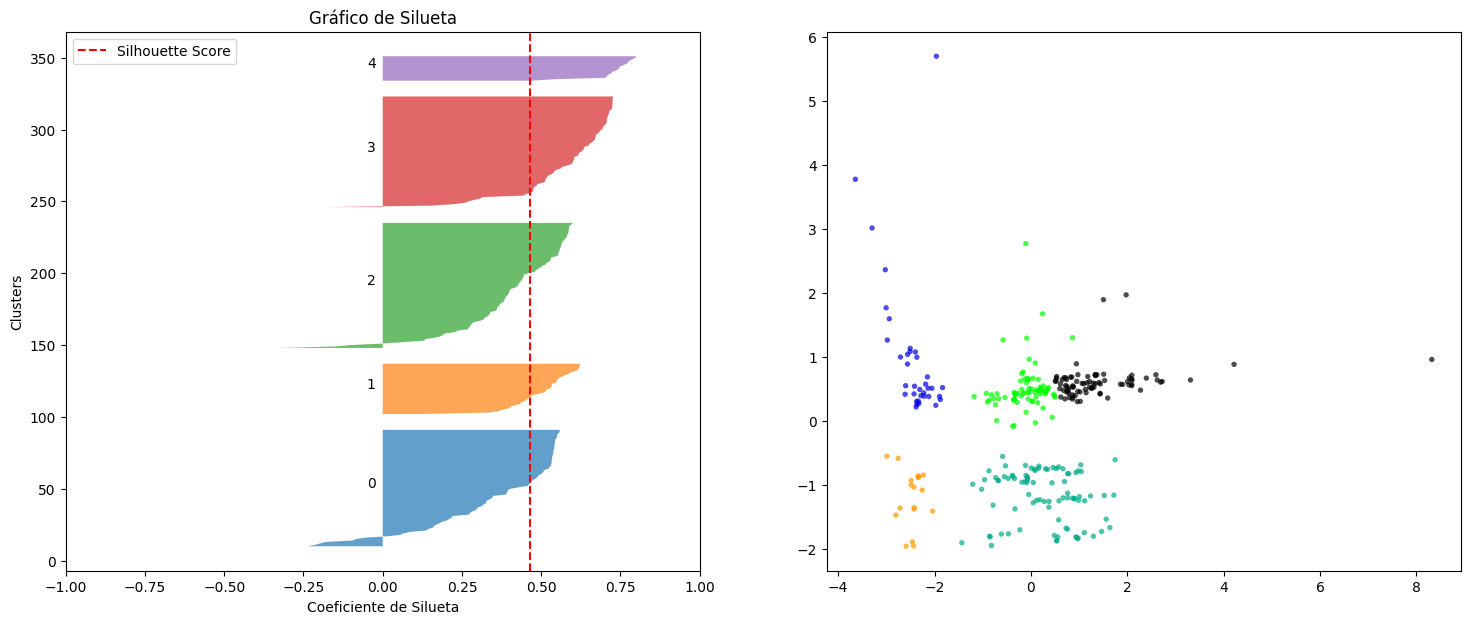

<Figure size 800x500 with 0 Axes>

In [137]:
graficaSilueta(dfx_filtrado[[0,1]],dfx_filtrado['Clusters'].values,n_cluster)

Debido a que no me ha dado un coeficiente de silueta  optimo vamos a buscar el numero de clusters optimos

## 2. Clustering DBSCAN
Libreria:SKlaern<br>
 Modelo:DBSCAN

### Busqueda del EPS

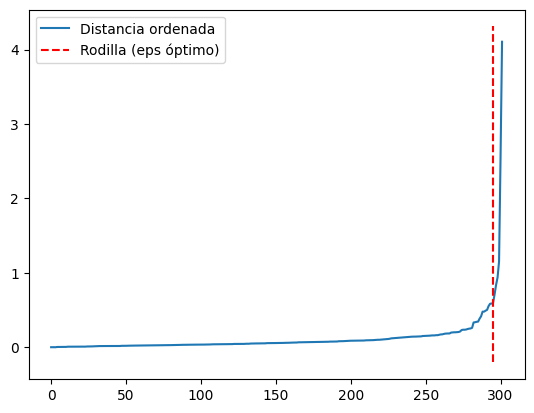

El valor óptimo de eps es: 0.5950073346805638


In [138]:
x_f=X_pca.copy()
nearest_neighbors = NearestNeighbors(n_neighbors=2)
neighbors = nearest_neighbors.fit(x_f)
distances, indices = neighbors.kneighbors(x_f)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances,label="Distancia ordenada")
kneedle = KneeLocator(range(len(distances)), distances, S=1, curve="convex", direction="increasing")
plt.vlines(kneedle.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed',color='r',label="Rodilla (eps óptimo)")
plt.legend()
plt.show()
print(f"El valor óptimo de eps es: {distances[kneedle.elbow]}")


#### Definición y entrenamiento del modelo

In [139]:
dbscan = DBSCAN(eps=distances[kneedle.elbow],min_samples=20)
cluster_labels = dbscan.fit_predict(x_f)

#### Grafica Silueta

Coeficiente de Silueta Promedio: 0.398


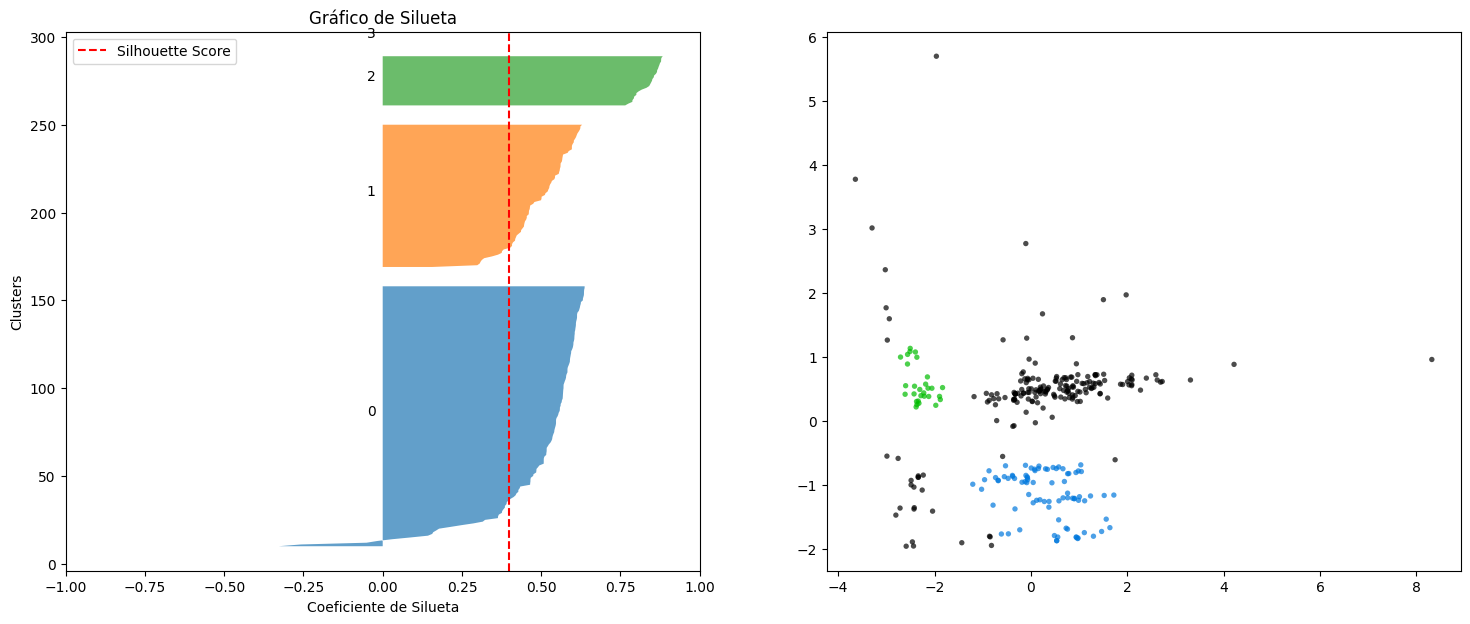

<Figure size 800x500 with 0 Axes>

In [140]:
x_fdf=pd.DataFrame(x_f)
graficaSilueta(x_fdf,cluster_labels,len(np.unique(cluster_labels)))

#### Filtrado de datos "Ruido"

In [141]:
dfx_filtrado , n_cluster= filtrado(x_fdf,cluster_labels)

Distribución original INCLUYENDO ruido:
Cluster    Count      Percentage
0          149        49.34     %
1          82         27.15     %
-1         42         13.91     %
2          29         9.6       %

Distribución SIN ruido pero CON clusters pequeños:
Cluster    Count      Percentage
0          149        57.31     %
1          82         31.54     %
2          29         11.15     %

--------------------------------------------------
Datos originales: 302 registros
Ruido eliminado: 42 registros
Clusters pequeños eliminados: 0
Número final de clusters: 3

Distribución FINAL de clusters significativos:
Cluster    Count      Percentage
0          149        57.31     %
1          82         31.54     %
2          29         11.15     %


#### Grafica de Puntos

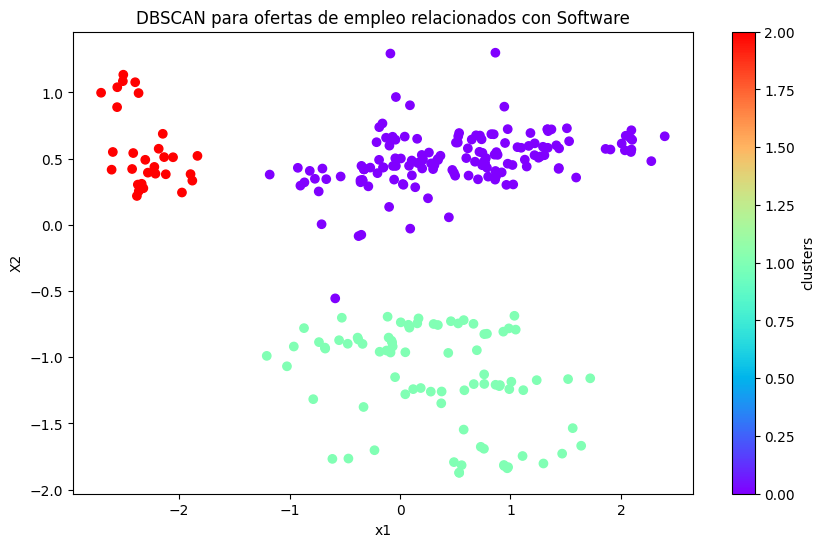

In [142]:
scatter(dfx_filtrado[0], dfx_filtrado[1],dfx_filtrado['Clusters'],'DBSCAN')

#### Grafica Silueta Filtrada

Coeficiente de Silueta Promedio: 0.533


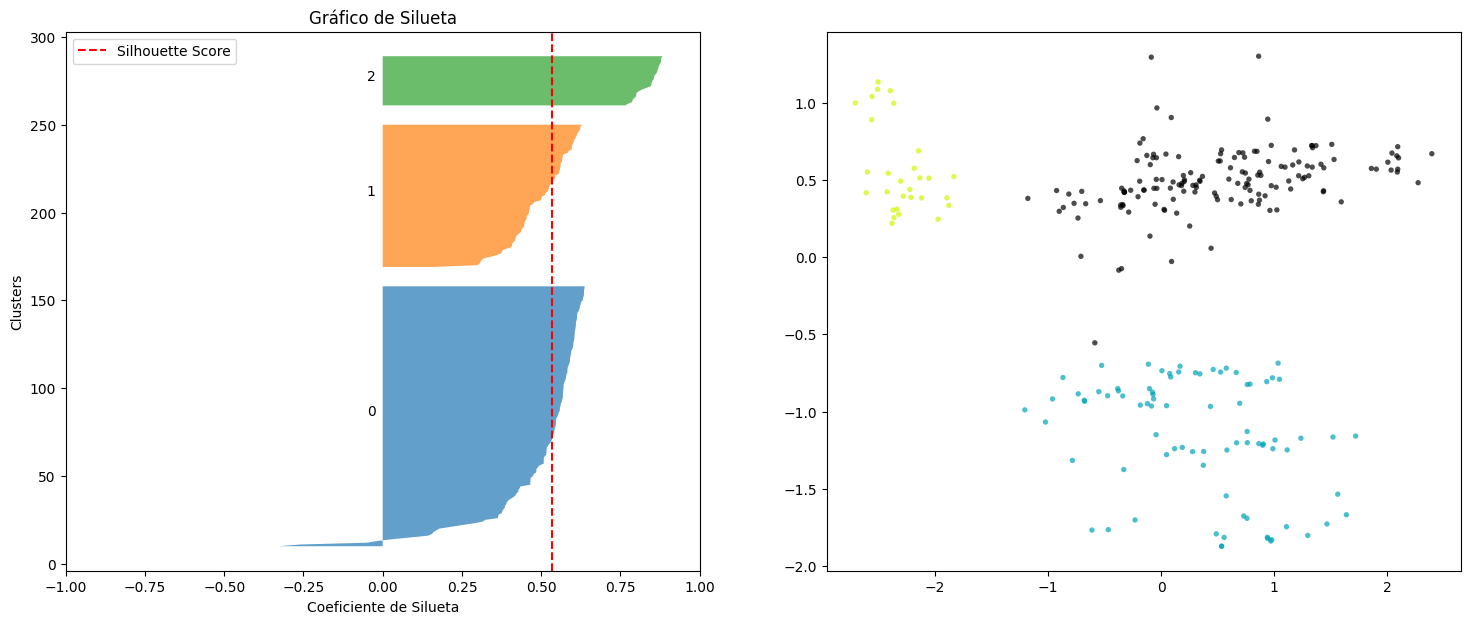

<Figure size 800x500 with 0 Axes>

In [143]:
graficaSilueta(dfx_filtrado[[0,1]],dfx_filtrado['Clusters'],n_cluster)

#### Comentarios Finales de la parte II

Siendo sincero no estoy seguro que tan correcto o no es hacer el fitrado de datos para mejorar el coeficiente de silueta, por eso presento antes y despues. En esta parte aprendi bastante y estuve estancado un tiempo por no pensar fuera de la caja en ciertas situaciónes una buena practica para el pensamiento lateral. 

# Conclusiones 

Los modelos desarrollados muchos no son buenos,busque que todos fuera como minimo decentes, pero pese a intentar hacerlo,  me di cuenta que trabajar con dataset reales es más complicado que con los de prueba,voy a necesitar algunos meses para encontrar modelos y ajustes mejores y evitar el overfitting y el underfitting, como mencione en los comentarios de cada parte fue una gratificante experiencia y un buen avance a mi proyecto integrador, hay manipulacion de datos que realice pero retire del notebook porque no afectaban a este proyecto final de materia pero si a mi proyecto integrador. 